Notebook to experiment with MAP-Elites.

@author: Dáire Campbell <daireiscool@gmail.com>

Notes:
* Notebook is to test MAP-Elites.  
* Currently only looking at 2d MAP-elites.  
* Currently using pandas, will convert to numpy array


In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import tqdm

In [270]:
class MAP_Elites:
    """
    Function to perform MAP-Elites.

    ::param iterations: (int)
    ::param initial: (int) Number of initial solution
        iterations > initial
    ::param cell_dimensions: (tuple(float, float))
    ::param max_x: (float)
    ::param min_x: (float)
    ::param max_y: (float)
    ::param min_y: (float)
    """    
    def __init__(
        self,
        iterations=1000000,
        initial=1000,
        cell_dimensions=(0.1, 0.1),
        max_x=10,
        min_x=-10,
        max_y=10,
        min_y=-10,
    ):
        """
        Initiation function to perform MAP-Elites.

        ::param iterations: (int)
        ::param initial: (int) Number of initial solution
            iterations > initial
        ::param cell_dimensions: (tuple(float, float))
        ::param max_x: (float)
        ::param min_x: (float)
        ::param max_y: (float)
        ::param min_y: (float)
        """
        self.iterations = iterations
        self.initial = initial
        self.cell_dimensions = cell_dimensions
        self.max_x = max_x
        self.min_x = min_x
        self.max_y = max_y
        self.min_y = min_y
        self.x_values = np.arange(min_x, max_x, cell_dimensions[0])
        self.y_values = np.arange(min_y, max_y, cell_dimensions[1])
        self.X = pd.DataFrame(
            index=self.y_values, columns=self.x_values)
        self.P = pd.DataFrame(
            index=self.y_values, columns=self.x_values)


    def random_variation(self, x_, x__, weight=0.5):
        """
        Randomly apply variation to x.
        
        ::param x_: (tuple(float, float))
        ::param x__: (tuple(float, float))
        ::param weight: (float) Randomness to apply
        """
        for i in [0,1]:
            if random.choice([True, False]):
                if random.choice([True, False]):
                    x_[i] = np.mean([x_[i], (self.max_x, self.max_y)[i]])
                else:
                    x_[i] = np.mean([x_[i], (self.min_x, self.min_y)[i]])
    
            else:
                if random.choice([True, False]):
                    x_[i] = np.mean([x_[i], random.choice(x__)])
                else:
                    x_[i] = np.mean([x_[i], random.choice(x__)])
        return x_
            

    def fit(self, f):
        """
        Function to perform MAP-Elites.

        ::param f: (function)
        """
        X = []

        for i in tqdm.tqdm(range(self.iterations)):
            if i < self.initial:
                point = [
                    random.uniform(-10, 10),
                    random.uniform(-10, 10)]
            else:
                x_ = random.choice(X)
                x__ = random.choice(X)
                point = self.random_variation(x_, x__)

            loc = (
                [j for j in self.X.columns if j > point[0]-self.cell_dimensions[0]][0],
                [j for j in self.X.index if j > point[1]-self.cell_dimensions[1]][0])
            p = f(point)
            val = self.P.loc[loc[0]][loc[1]]
            if (np.isnan(val)) | (val < p):
                self.X.loc[loc[0]][loc[1]] = point
                self.P.loc[loc[0]][loc[1]] = p
            
                X += [point]

In [287]:
def function(x_):
    return np.sin(x_[0])*np.cos(x_[1])


In [294]:
me = MAP_Elites(
    iterations=2000000,
    initial=1000,
    cell_dimensions=(0.01, 0.01),
    max_x=10,
    min_x=-10,
    max_y=10,
    min_y=-10,
)

In [ ]:
me.fit(function)

  7%|▋         | 142848/2000000 [02:59<38:55, 795.27it/s]

In [ ]:
sns.heatmap(me.P.fillna(0))

<AxesSubplot:>

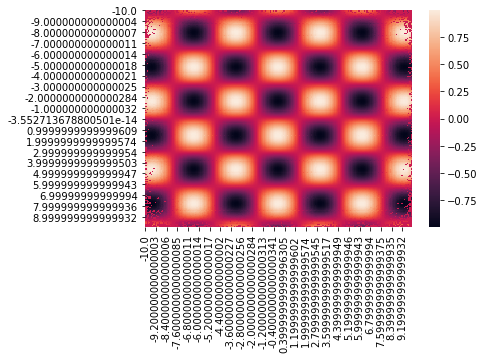

In [293]:
sns.heatmap(me.P.fillna(0))

<AxesSubplot:>

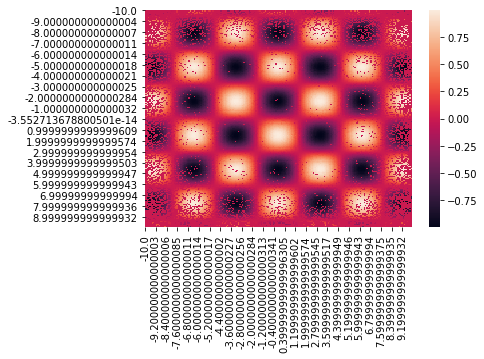

In [290]:
sns.heatmap(me.P.fillna(0))